## 병원 개폐업 예측

1. 분석 목적,결론 도출방식 정의 <br>


2. 데이터 탐색(EDA) <br>
    : 컬럼 명세 <br>
    : 결측치 파악 및 대체,제거 <br>
    : 이상치 파악 <br>
    : 시각화 통한 EDA <br>
    
    <br>
    
3. Feature Engineering <br>
    : Feature Vector 생성 <br>
 
    <br>
 
4. Modeling <br>
    : k-ford , cross validation 통한 최적 모델 채택

### 1. 분석 목적, 결론 도출방식 정의 <br>

> 상환 기간 동안의 계속 경영 여부를 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 병원들에게 금융 기회를 제공

> 또한, 병원의 "폐업"을 예측함으로써 은행의 원금손실을 줄임
 
> "accuracy"로 정확도 측정

### 2. EDA

#### 2.1 컬럼명세

> 컬럼의 경우 총 58개의 열로, 크게 병원에 대한 기본정보와 재무(회계)정보로 나누어짐

> ```기본정보```

inst_id - 각 파일에서의 병원 고유 번호

OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

sido – 병원의 광역 지역 정보

sgg – 병원의 시군구 자료

openDate – 병원 설립일

bedCount - 병원이 갖추고 있는 병상의 수

instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

종합병원 : 입원환자 100명 이상 수용 가능

병원 : 입원 환자 30명 이상 100명 미만 수용 가능

의원 : 입원 환자 30명 이하 수용 가능

한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

> ```재무(회계)``` 정보 ( * 1의 경우 17년도, 2의 경우 16년도 데이터를 의미)

revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

salary1 – 급여, 2017(회계년도)년 데이터를 의미함

noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함

employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

ownerChange – 대표자의 변동 여부  

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [4]:
train.shape

(301, 58)

In [5]:
# 컬럼별 결측값 개수 확인
train.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


> 결측치 살펴보기

In [6]:
null_check = train.loc[(train.isnull().sum(1) >= 1) , : ]
print("결측값을 가진 row(병원)중 폐업한 병원의 수 : " , len(null_check[null_check['OC'] == " close"]))

결측값을 가진 row(병원)중 폐업한 병원의 수 :  8


> 결측치의 경우 전체 301개의 row(각 row는 각 병원을 의미)에서 차지하는 비중이 적다. 따라서 우선, 결측값을 제거한 후 진행

> 결측값을 가진 row가 특정 지역 혹은, 특징을 가진다면 따로 살펴보아야할 필요

In [7]:
# 결측값 제거
train.dropna(axis=0,inplace=True)

> 결측값 가진 row(각 병원)제거 시 총 24개의 row가 제거됨. 이는 전체 row의 약8%에 해당

> 개/폐업에 따른 특징을 비교하기 위해 개/폐업 여부에 따라 분리

In [8]:
train_open = train[train['OC'] == "open"]
train_close = train[train['OC'] == " close"]

print("2017년 폐업한 병원의 수 : " , len(train_close))

2017년 폐업한 병원의 수 :  7


> 결측치를 제거한 데이터 중 폐업한 병원의 수는 전체 277개 중 7개이다. 

> 결측치를 포함한 데이터 24개( 위에서 제거한)중 폐업한 병원의 수는 8개이다. 따라서 결측치를 가진 데이터를 제거할지에 대한 재고려가 필요하다. 결측치를 살펴본 결과 회계(재무)데이터에 대한 결측치를 갖고 있으며 기본 데이터에서는 침대수(bedcount)를 제외하고는 결측치가 없다

In [9]:
null_close =  null_check[null_check['OC'] == " close"]
null_check[null_check['OC'] == " close"] # 확인

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.0,85.0,74.0,same
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
193,281,close,gyeonggi,12,20121213,NaN,NaN,3.054388e+08,2.241614e+07,4.674753e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,15.0,15.0,change
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.0,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,100.0,NaN,NaN


> 결측치에 대한 재고려를 위해 폐업한 병원의 데이터를 살펴본 결과, 침대수(bedCount),직원수,오너교체여부에서만 결측치가 발생하였고 전반적인 재무데이터에 대한 결측치는 존재하지 않기 때문에 우선 그대로 사용

In [10]:
# 결측치 데이터 사용 반영

train_close = pd.concat([train_close,null_close])
train_close

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
111,164,close,jeonbuk,136,20050321,326.0,nursing_hospital,2.179021e+09,3.122066e+08,1.507567e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,322.0,320.0,same
141,209,close,busan,63,19991112,151.0,hospital,8.845472e+09,0.000000e+00,7.958490e+09,...,1.495243e+10,1.001811e+10,6.250000e+09,4.934328e+09,4.922328e+09,2.500740e+08,0.0,110.0,110.0,same
158,238,close,jeonnam,19,20150316,119.0,hospital,3.581089e+09,5.106416e+08,2.848303e+09,...,5.376396e+09,2.031396e+09,2.986417e+08,3.350000e+09,3.350000e+09,4.221729e+09,0.0,64.0,77.0,change
177,265,close,jeonnam,53,20051111,652.0,nursing_hospital,1.683125e+10,2.372298e+09,1.234589e+10,...,1.430577e+10,1.682877e+09,2.521391e+06,1.262290e+10,7.366342e+09,1.606544e+10,0.0,342.0,278.0,change
214,309,close,seoul,36,20141226,0.0,clinic,9.125255e+08,5.824151e+07,1.012169e+09,...,1.035994e+09,3.075474e+08,0.000000e+00,7.284463e+08,7.284463e+08,1.679837e+09,0.0,16.0,15.0,change
261,366,close,gyeonggi,98,20170120,0.0,traditional_clinic,7.162790e+09,8.758944e+08,5.387362e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,79.0,70.0,same
290,414,close,gyeonggi,169,20140620,200.0,general_hospital,2.375764e+09,8.048178e+08,3.662180e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,114.0,114.0,change
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.0,85.0,74.0,same
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN


> 폐업한 병원의 위치 탐색

In [11]:
print('시/도별 폐업 병원 수')
train_close.groupby('sido').size().sort_values(ascending=False)

시/도별 폐업 병원 수


sido
gyeonggi     5
jeonnam      3
jeonbuk      2
gyeongbuk    2
seoul        1
choongnam    1
busan        1
dtype: int64

> 폐업한 병원의 지속년수 탐색

In [12]:
train_close_year = train_close[['inst_id','openDate']]

def cal_year(x):
    result = str(x)[:4]
    return result

train_close_year['openDate'] = train_close_year['openDate'].apply(cal_year)
train_close_year['폐업병원지속년수'] = 2017 - train_close_year['openDate'].astype('int')
train_close_year

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,inst_id,openDate,폐업병원지속년수
111,164,2005,12
141,209,1999,18
158,238,2015,2
177,265,2005,12
214,309,2014,3
261,366,2017,0
290,414,2014,3
35,58,2013,4
71,107,1999,18
93,140,2007,10


In [13]:
train_close_year['폐업병원지속년수'].describe()

count    15.000000
mean     10.133333
std       9.054333
min       0.000000
25%       3.000000
50%      10.000000
75%      15.000000
max      34.000000
Name: 폐업병원지속년수, dtype: float64

> 폐업병원의 지속년수를 살펴본 결과 평균 10년, 표준편차 9의 값을 가진다.

> 폐업병원 중 2017년 개원하여 2017년 폐업한 병원이있다.

> 폐업병원의 업종 탐색결과 hospital , nursing_hospita이 각 5개로 대부분을 차지함을 볼 수 있다.

* hospital => 입원 환자 30명 이상 100명 미만 수용 가능 <br>
* nursing_hospital => 요양병원

In [14]:
train_close.groupby('instkind').size()

instkind
clinic                  1
general_hospital        1
hospital                5
nursing_hospital        5
traditional_clinic      1
traditional_hospital    1
dtype: int64

> 폐업한 병원의 재무상태 탐색

- 폐업한 병원의 폐업직전년도와 폐업년도 재무상태 변화(매출,당기순이익,유동자산,단기차입금,이자비용,순자산총계,부채총계)

In [15]:
# 재무데이터 추출

train_close_account = train_close

train_close_account['매출변동'] = train_close['revenue2'] - train_close['revenue1']
train_close_account['당기순이익'] = train_close['profit2'] - train_close['profit1']
train_close_account['유동자산'] = train_close['liquidAsset2'] - train_close['liquidAsset1']
train_close_account['단기차입금'] = train_close['shortLoan2'] - train_close['shortLoan1']
train_close_account['이자비용'] = train_close['interest2'] - train_close['interest1']
train_close_account['순자산총계'] = train_close['netAsset2'] - train_close['netAsset1']
train_close_account['부채총계'] = train_close['debt2'] - train_close['debt1']

train_close_account = train_close_account[['매출변동','당기순이익','유동자산','단기차입금','이자비용','순자산총계','부채총계']]

In [16]:
train_close_account.describe()

,매출변동,당기순이익,유동자산,단기차입금,이자비용,순자산총계,부채총계
count,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01
mean,-8.879602e+08,-3.422199e+08,1.332907e+07,1.696446e+08,1.122646e+07,-1.732441e+09,-8.562932e+08
std,2.259707e+09,1.522145e+09,1.773914e+09,1.622680e+09,1.196254e+08,2.810693e+09,5.284830e+09
min,-6.717144e+09,-4.218571e+09,-3.535250e+09,-1.750000e+09,-1.709688e+08,-7.720191e+09,-1.249684e+10
25%,-2.140046e+09,-5.361842e+08,-5.139393e+08,-8.739304e+06,-2.614496e+07,-3.062756e+09,-1.703893e+08
50%,-5.886334e+08,-1.048886e+08,0.000000e+00,0.000000e+00,-7.982223e+06,-5.236575e+06,0.000000e+00
75%,4.740113e+07,5.222643e+07,2.310135e+08,0.000000e+00,7.994557e+07,0.000000e+00,8.971891e+07
max,3.132198e+09,2.483311e+09,4.877154e+09,5.700000e+09,2.317879e+08,1.804672e+08,8.297345e+09


In [17]:
def mapping_OC(x):
    result= None
    if x == "open":
        result = 1
    elif x == " close":
        result = 0
    return result

train['OC'] = train['OC'].apply(mapping_OC)

## 분산분석을 통한 특성 선택

In [33]:
from sklearn.feature_selection import SelectPercentile, f_classif

# 17년도(폐업년도)
t_list = ['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1','employee1','bedCount']

# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정
standard_scaler = StandardScaler()
standard_scaler.fit(train[t_list])

X_scaled = standard_scaler.transform(train[t_list])

select = SelectPercentile(score_func=f_classif, percentile=50 ) #F 검정 
select.fit(X_scaled, train.OC)

X_scaled_selected = select.transform(X_scaled)

print("원본 X_train.shape:", X_scaled.shape)
print("X_train_selected.shape:", X_scaled_selected.shape)

원본 X_train.shape: (277, 26)
X_train_selected.shape: (277, 13)


C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [16] are constant.
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## 주성분 분석

(277, 13)
(277, 2)


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


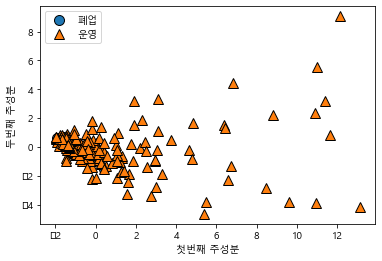

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


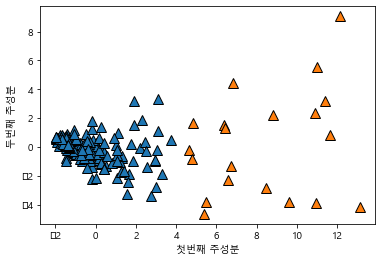

In [38]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

#####################################
from sklearn.preprocessing import StandardScaler

# 17년도(폐업년도)
t_list = ['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1','employee1','bedCount']

# 16년도(폐업 직전년도)
t_list2 = ['revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2','employee2','bedCount']

#각 특성의 분산이 1이 되도록 데이터의 스케일조정
scaler = StandardScaler()
scaler.fit(X_scaled_selected)
X_Scaled = scaler.transform(X_scaled_selected)

#####################################
from sklearn.decomposition import PCA
pca = PCA(n_components=2)        # 두 개의 주성분만 유지 .
pca.fit(X_Scaled)                # PCA 모델 

X_pca = pca.transform(X_Scaled)  # 두 개의 주성분만 유지하는 데이터 변환 (차원축소)  
print( X_Scaled.shape ) #(569, 30)  569행 30열 
print( X_pca.shape )    #(569, 2)  차원 축소 후   569행 2열
#print(cancer.target)

#####################################
import mglearn
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['OC'])
plt.legend(["폐업","운영"],loc="best")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()

#####################################

### 군집화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_Scaled)
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],kmeans.labels_,markers='^')
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
plt.show()
